In [93]:
#Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
import yfinance as yf
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [94]:
#Getting data for the Apple Stock
aapl = yf.Ticker("AAPL")
# Get historical market data
aapl.dataset = aapl.history(period="max")

In [95]:
# Apple Stocks Information
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [96]:
#Dataframe basic information on rows and columns
aapl.dataset.shape

(10427, 7)

In [112]:
#Dataframe columns
aapl.dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [97]:
#Information regarding the dataset
aapl.dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10427 entries, 1980-12-12 to 2022-04-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10427 non-null  float64
 1   High          10427 non-null  float64
 2   Low           10427 non-null  float64
 3   Close         10427 non-null  float64
 4   Volume        10427 non-null  int64  
 5   Dividends     10427 non-null  float64
 6   Stock Splits  10427 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 651.7 KB


In [98]:
#Summary of Statistics
aapl.dataset.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10427.000000,10427.000000,10427.000000,10427.000000,1.042700e+04,10427.000000,10427.000000
mean,13.616999,13.765218,13.470239,13.623829,3.317384e+08,0.000589,0.001630
std,30.579462,30.928255,30.240507,30.601052,3.392067e+08,0.009877,0.085923
min,0.038822,0.038822,0.038385,0.038385,0.000000e+00,0.000000,0.000000
25%,0.235284,0.240213,0.229512,0.234991,1.243200e+08,0.000000,0.000000
50%,0.387617,0.395262,0.380475,0.388436,2.193744e+08,0.000000,0.000000
75%,12.288757,12.457872,12.176728,12.331877,4.121768e+08,0.000000,0.000000
max,182.397624,182.707227,178.892080,181.778397,7.421641e+09,0.220000,7.000000


In [99]:
#Latest Stock Data in the Dataset
aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0
2022-04-19,165.020004,167.820007,163.910004,167.399994,67627500,0.0,0.0
2022-04-20,168.759995,168.860001,166.514999,166.899994,23967306,0.0,0.0


In [100]:
#Start Stock Data in the Dataset
aapl.dataset.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0


In [101]:
#Checking for Null Values
aapl.dataset.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [110]:
#let's check if there is any duplicate data
print(aapl.dataset.duplicated().any())
print(aapl.dataset.duplicated().sum())

False
0


<AxesSubplot:>

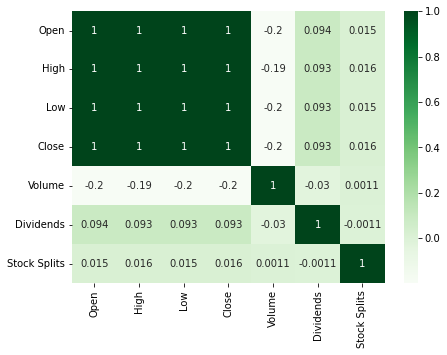

In [102]:
#Plottin Heat Map
plt.figure(figsize=(7,5))
sns.heatmap(aapl.dataset.corr(),cmap='Greens',annot=True)

In [106]:

#Getting data for the Apple Stock for 10 years for visualisation purposes
aapl = yf.Ticker("AAPL")
# Get historical market data
aapl.dataset = aapl.history(period="10y")

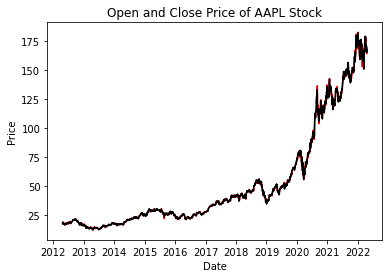

In [111]:
#Plotting Open and Closing Prices of AAPL Stock

plt.title("Open and Close Price of AAPL Stock")
plt.plot(aapl.dataset['Open'], 'red')
plt.plot(aapl.dataset['Close'], 'black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

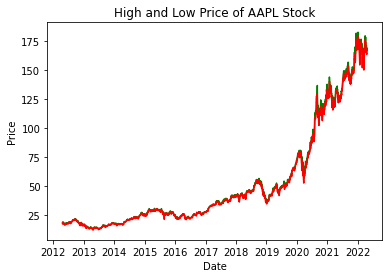

In [113]:
#Plotting High and Low Price Prices

plt.title("High and Low Price of AAPL Stock")
plt.plot(aapl.dataset['High'], 'green')
plt.plot(aapl.dataset['Low'], 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()